In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the style
sns.set(style="whitegrid")
sns.set_context("talk")

# Define your files
files = {
    "bulk_embeddings": "rf/results/bulk_embeddings_30_pcs_tissue_growth.csv",
    "bulk_voom": "rf/results/bulk_30_pcs_tissue_growth.csv",
}

# Load files into one long-format dataframe
combined_df = pd.DataFrame()


for method, filename in files.items():
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        if "DRUG_ID" in df.columns and "r2_mean" in df.columns:
            df["Method"] = method
            df["Method"] = df["Method"].replace({
    "bulk_embeddings": "bulk\nembeddings",
    "bulk_voom": "bulk\nvoom"
})
            combined_df = pd.concat([combined_df, df[["DRUG_ID", "r2_mean", "Method"]]], ignore_index=True)
        else:
            print(f"⚠️ Skipping {filename}: Missing required columns")
    else:
        print(f"⚠️ File not found: {filename}")


/tmp/ipykernel_2702973/2508774174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Method", y="r2_mean", data=combined_df, palette="Set2")


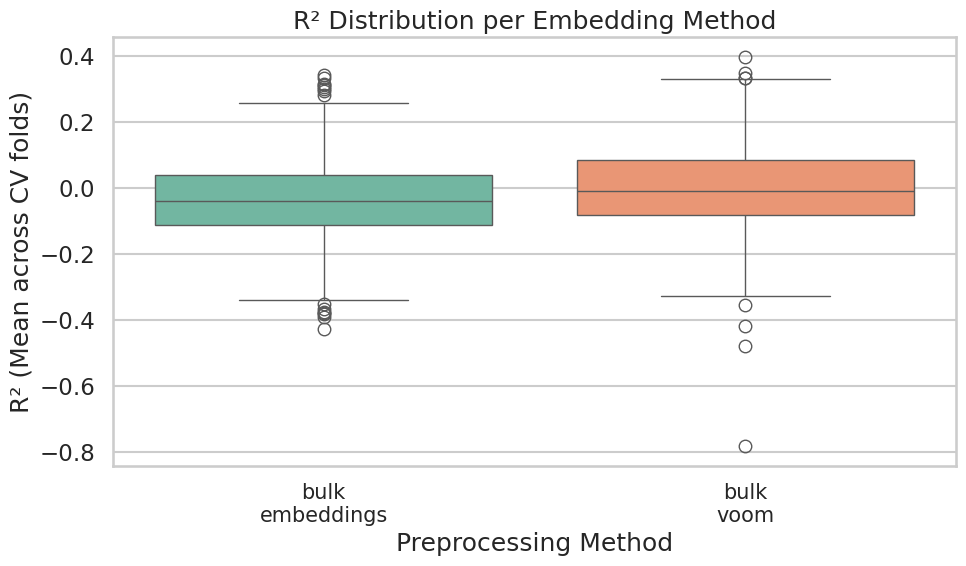

In [2]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Method", y="r2_mean", data=combined_df, palette="Set2")
plt.title("R² Distribution per Embedding Method")
plt.ylabel("R² (Mean across CV folds)")
plt.xlabel("Preprocessing Method")
plt.xticks(rotation=0, ha="center", fontsize=15)
plt.tight_layout()
plt.show()


📊 Mean R² values by method:
             Method  Mean R²
1        bulk\nvoom  0.00109
0  bulk\nembeddings -0.03761


/tmp/ipykernel_2702973/3767571970.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=r2_df, x="Method", y="Mean R²", palette="Set2")


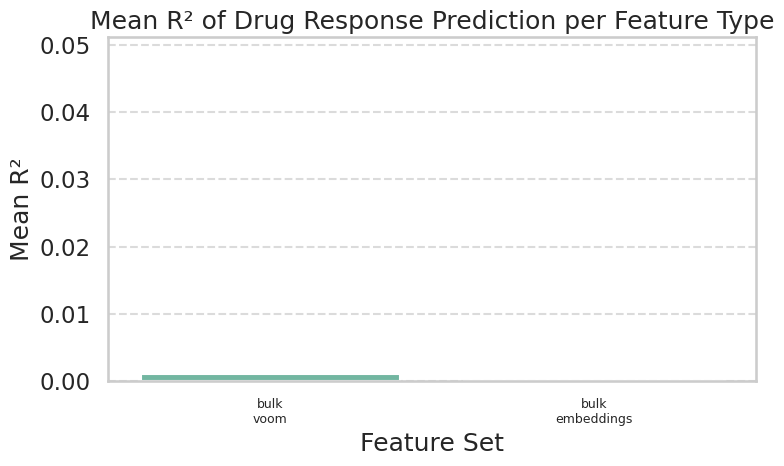

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths to compare
files = {
    "bulk_embeddings": "rf/results/bulk_embeddings_30_pcs_tissue_growth.csv",
    "bulk_voom": "rf/results/bulk_30_pcs_tissue_growth.csv",
}

# Calculate mean R² per model
mean_r2_by_model = []
for name, path in files.items():
    df = pd.read_csv(path)
    mean_r2 = df["r2_mean"].mean()
    
    # Add line breaks for long names
    name_pretty = name.replace("bulk_", "bulk\n")
    mean_r2_by_model.append((name_pretty, mean_r2))

# Create DataFrame
r2_df = pd.DataFrame(mean_r2_by_model, columns=["Method", "Mean R²"]).sort_values("Mean R²", ascending=False)

# Display results
print("📊 Mean R² values by method:")
print(r2_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=r2_df, x="Method", y="Mean R²", palette="Set2")
plt.title("Mean R² of Drug Response Prediction per Feature Type")
plt.ylabel("Mean R²")
plt.xlabel("Feature Set")
plt.ylim(0, r2_df["Mean R²"].max() + 0.05)
plt.xticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [5]:
# Load all results
results = {
    "bulk_embeddings": pd.read_csv("rf/results/bulk_embeddings_30_pcs_tissue_growth.csv"),
    "bulk_voom": pd.read_csv("rf/results/bulk_30_pcs_tissue_growth.csv"),
}

# Merge on DRUG_ID
merged_df = results["bulk_voom"][["DRUG_ID", "r2_mean"]].rename(columns={"r2_mean": "bulk_voom"})
for name, df in results.items():
    if name != "bulk_voom":
        merged_df = merged_df.merge(df[["DRUG_ID", "r2_mean"]].rename(columns={"r2_mean": name}), on="DRUG_ID")

# Compare each method to voom_direct
baseline = "bulk_voom"
for method in ["bulk_embeddings"]:
    delta_col = f"Δ_{baseline}_vs_{method}"
    merged_df[delta_col] = merged_df[baseline] - merged_df[method]
    
    improved = (merged_df[delta_col] > 0).sum()
    worsened = (merged_df[delta_col] < 0).sum()
    unchanged = (merged_df[delta_col] == 0).sum()
    mean_delta = merged_df[delta_col].mean()
    
    print(f"\n📊 Comparison: voom vs. {method}")
    print(f"Drugs where voom is better: {improved}")
    print(f"Drugs where voom is worse: {worsened}")
    print(f"Unchanged: {unchanged}")
    print(f"Mean ΔR² (voom - {method}): {mean_delta:.4f}")



📊 Comparison: voom vs. bulk_embeddings
Drugs where voom is better: 420
Drugs where voom is worse: 205
Unchanged: 0
Mean ΔR² (voom - bulk_embeddings): 0.0387


/tmp/ipykernel_2702973/2520510575.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x="Method", y="r2_mean", palette="Set2")


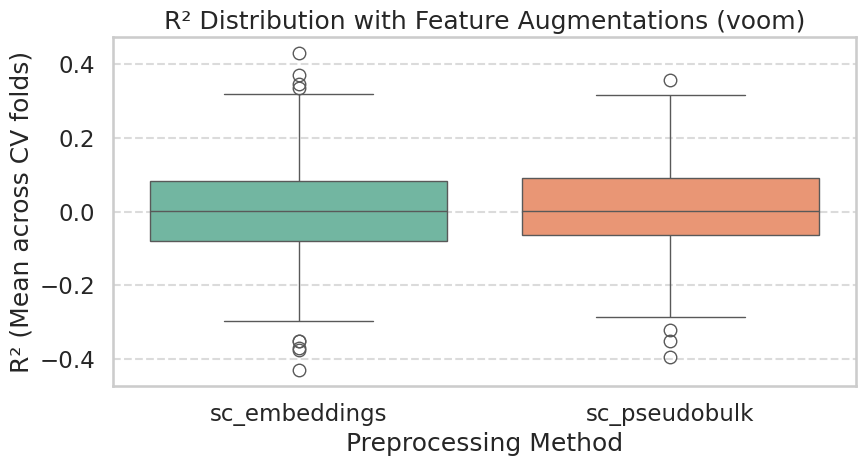

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load performance results
df_embeddings = pd.read_csv("rf/results/pancancer_embeddings_30_pcs_tissue_growth.csv")
df_pseudobulk = pd.read_csv("rf/results/pancancer_pseudobulk_30_pcs_tissue_growth.csv")

# Add a method column to each
df_embeddings["Method"] = "sc_embeddings"
df_pseudobulk["Method"] = "sc_pseudobulk"

# Combine
combined = pd.concat([df_embeddings, df_pseudobulk], ignore_index=True)

# Plot
plt.figure(figsize=(9, 5))
sns.boxplot(data=combined, x="Method", y="r2_mean", palette="Set2")
plt.title("R² Distribution with Feature Augmentations (voom)")
plt.xlabel("Preprocessing Method")
plt.ylabel("R² (Mean across CV folds)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

# Load the relevant results
df_embeddings = pd.read_csv("rf/results/pancancer_embeddings_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_mean"]].rename(columns={"r2_mean": "R2_embeddings"})
df_pseudobulk = pd.read_csv("rf/results/pancancer_pseudobulk_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_mean"]].rename(columns={"r2_mean": "R2_pseudobulk"})

# Merge the embeddings and pseudobulk data on DRUG_ID
merged = df_embeddings.merge(df_pseudobulk, on="DRUG_ID")

# Calculate the mean R² for each version
mean_r2 = merged[["R2_embeddings", "R2_pseudobulk"]].mean()
print("📊 Mean R² per model:")
print(mean_r2.sort_values(ascending=False))

# Compute ΔR² (difference in performance between embeddings and pseudobulk)
merged["Δ_embeddings_vs_pseudobulk"] = merged["R2_pseudobulk"] - merged["R2_embeddings"]

# Report on the comparison
print("\n📈 Comparison between Pancancer Embeddings and Pancancer Pseudobulk:")
print(f"Improved: {(merged['Δ_embeddings_vs_pseudobulk'] > 0).sum()}")  # Drugs where pseudobulk performed better
print(f"Worsened: {(merged['Δ_embeddings_vs_pseudobulk'] < 0).sum()}")  # Drugs where embeddings performed better
print(f"Unchanged: {(merged['Δ_embeddings_vs_pseudobulk'] == 0).sum()}")  # Drugs where the performance is the same
print(f"Mean ΔR²: {merged['Δ_embeddings_vs_pseudobulk'].mean():.4f}")  # Mean difference in R²



📊 Mean R² per model:
R2_pseudobulk    0.012688
R2_embeddings    0.003203
dtype: float64

📈 Comparison between Pancancer Embeddings and Pancancer Pseudobulk:
Improved: 349
Worsened: 276
Unchanged: 0
Mean ΔR²: 0.0095


In [12]:
import pandas as pd

# Load the relevant results for pancancer pseudobulk and bulk
df_pancancer_pseudobulk = pd.read_csv("rf/results/pancancer_pseudobulk_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_mean"]].rename(columns={"r2_mean": "R2_pancancer_pseudobulk"})
df_bulk = pd.read_csv("rf/results/bulk_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_mean"]].rename(columns={"r2_mean": "R2_bulk"})

# Merge pancancer pseudobulk with bulk data
merged = df_pancancer_pseudobulk.merge(df_bulk, on="DRUG_ID")

# Calculate the mean R² for both methods
mean_r2 = merged[["R2_pancancer_pseudobulk", "R2_bulk"]].mean()
print("📊 Mean R² per model:")
print(mean_r2.sort_values(ascending=False))

# Compute ΔR² (difference in performance between pancancer pseudobulk and bulk)
merged["Δ_pancancer_vs_bulk"] = merged["R2_pancancer_pseudobulk"] - merged["R2_bulk"]

# Report on the comparison
print("\n📈 Comparison between Pancancer Pseudobulk and Bulk:")
print(f"Improved: {(merged['Δ_pancancer_vs_bulk'] > 0).sum()}")  # Drugs where pancancer pseudobulk performed better
print(f"Worsened: {(merged['Δ_pancancer_vs_bulk'] < 0).sum()}")  # Drugs where bulk performed better
print(f"Unchanged: {(merged['Δ_pancancer_vs_bulk'] == 0).sum()}")  # Drugs where the performance is the same
print(f"Mean ΔR²: {merged['Δ_pancancer_vs_bulk'].mean():.4f}")  # Mean difference in R²


📊 Mean R² per model:
R2_pancancer_pseudobulk    0.012688
R2_bulk                    0.001090
dtype: float64

📈 Comparison between Pancancer Pseudobulk and Bulk:
Improved: 348
Worsened: 277
Unchanged: 0
Mean ΔR²: 0.0116


/tmp/ipykernel_2702973/2319658107.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=merged_long, x="R²", y="Method", palette="Set2", width=0.5)
/tmp/ipykernel_2702973/2319658107.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Improvement", loc="upper left", fontsize=12)


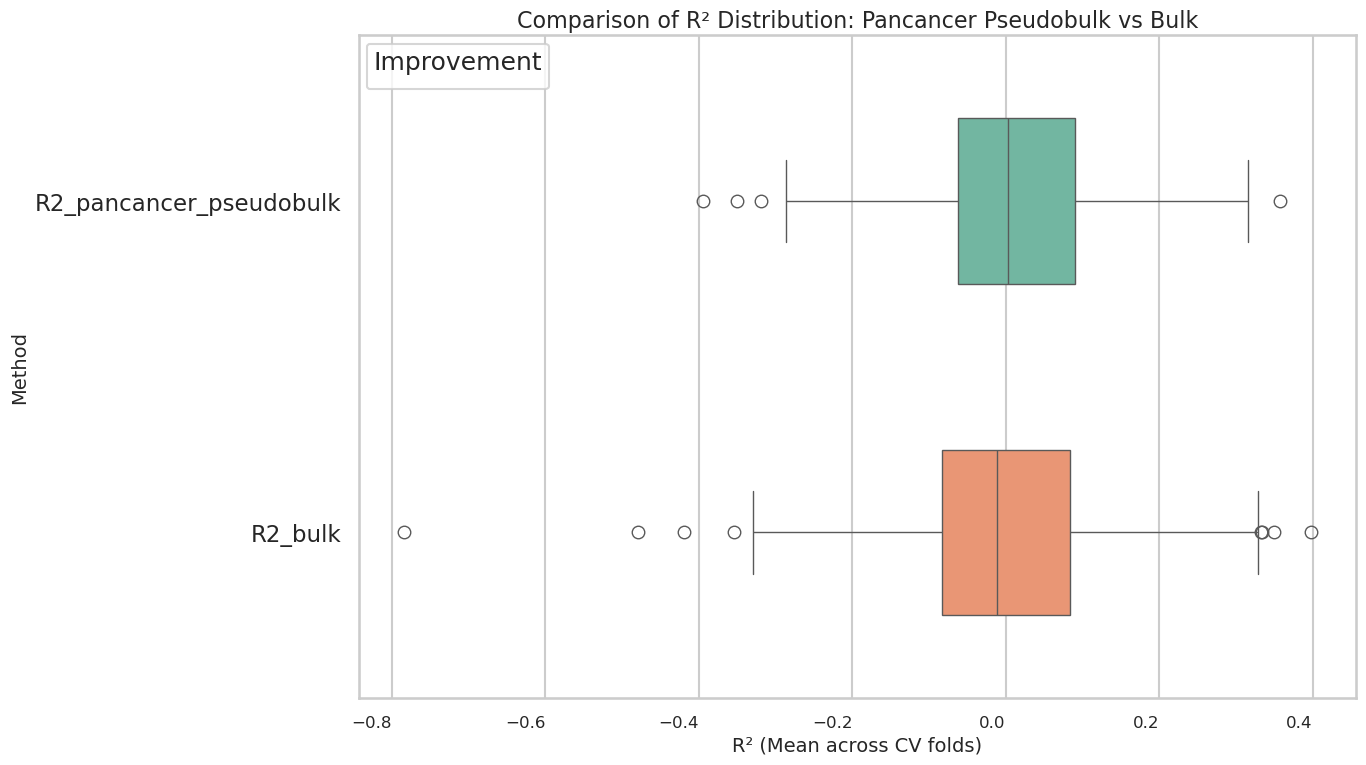

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the relevant results for pancancer pseudobulk and bulk
df_pancancer_pseudobulk = pd.read_csv("rf/results/pancancer_pseudobulk_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_mean"]].rename(columns={"r2_mean": "R2_pancancer_pseudobulk"})
df_bulk = pd.read_csv("rf/results/bulk_30_pcs_tissue_growth.csv")[["DRUG_ID", "r2_mean"]].rename(columns={"r2_mean": "R2_bulk"})

# Merge the datasets on DRUG_ID
merged = df_pancancer_pseudobulk.merge(df_bulk, on="DRUG_ID")

# Create a new DataFrame for plotting
merged_long = pd.melt(merged, id_vars=["DRUG_ID"], value_vars=["R2_pancancer_pseudobulk", "R2_bulk"], 
                      var_name="Method", value_name="R²")

# Now create the "Improvement" column by comparing the R² values for both methods per drug
merged_long["Improvement"] = merged_long.groupby("DRUG_ID")["R²"].transform(lambda x: "Improved" if x.iloc[0] < x.iloc[1] else "Worsened")

# Set up the plot with horizontal boxplots (without the lines)
plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=merged_long, x="R²", y="Method", palette="Set2", width=0.5)

# Adjust plot labels and title
plt.title("Comparison of R² Distribution: Pancancer Pseudobulk vs Bulk", fontsize=16)
plt.xlabel("R² (Mean across CV folds)", fontsize=14)
plt.ylabel("Method", fontsize=14)

# Improve legend positioning
plt.legend(title="Improvement", loc="upper left", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha="right", fontsize=12)

# Adjust layout and spacing for readability
plt.tight_layout()

# Show the plot
plt.show()
